In [19]:
import seaborn as sns
sns.set()

In [20]:
import pandas as pd
df = pd.read_csv("capstone.csv")
df

,conm,rect,revt,GVKEY,YEAR,recd,avg_vwretd,log_revt,log_rect,log_recd,log_avg_vwretd
0,ALBERTO-CULVER CO,154.207,2247.163,1239,2000,10.135,0.000000,7.717869,5.044760,2.410093,0.000000
1,ALBERTO-CULVER CO,169.657,2494.180,1239,2001,11.387,0.000000,7.822116,5.139656,2.516648,0.000000
2,ALBERTO-CULVER CO,209.010,2650.976,1239,2002,17.550,0.000000,7.883060,5.347155,2.920470,0.000000
3,ALBERTO-CULVER CO,226.054,2891.417,1239,2003,19.111,2.462588,7.969848,5.425188,3.001267,1.242016
4,ALBERTO-CULVER CO,250.008,3257.996,1239,2004,12.860,1.050260,8.089174,5.525485,2.629007,0.717967
...,...,...,...,...,...,...,...,...,...,...,...
7650,JUST EAT TAKEAWAY.COM N.V.,58.000,467.000,322576,2019,2.000,2.231376,6.148468,4.077537,1.098612,1.172908
7651,JUST EAT TAKEAWAY.COM N.V.,215.000,2461.000,322576,2020,7.000,1.873544,7.808729,5.375278,2.079442,1.055546
7652,CONTEXTLOGIC INC,93.000,1728.000,345980,2018,NaN,0.000000,7.455298,4.543295,NaN,0.000000
7653,CONTEXTLOGIC INC,95.000,1901.000,345980,2019,NaN,2.231376,7.550661,4.564348,NaN,1.172908


In [15]:
#recd: Receivables - Estimated Doubtful

# Three featuress to estimate 

# 1. rect: Total Receivables
# 2. revt: Total Revenue
# 3. avg_vwretd: CRSP Value-weighted return index from NYSE/NASDAQ. This is monthly data, so I averaged them based on year. 

In [21]:
four = df[['log_rect', 'log_revt', 'log_recd', 'log_avg_vwretd']]

four.describe()

,log_rect,log_revt,log_recd,log_avg_vwretd
count,7655.000000,7655.000000,5002.000000,7655.000000
mean,3.001992,6.599307,0.966772,0.581070
std,2.187063,2.295423,1.274762,0.469967
min,0.000000,0.000000,0.000000,0.000000
25%,1.225832,5.359967,0.024693,0.000000
50%,2.725759,6.681035,0.412441,0.715591
75%,4.520244,8.081367,1.442379,0.948305
max,10.361640,13.258213,7.515889,1.251595


In [22]:
corr_matrix = four.corr()

print(corr_matrix)

                log_rect  log_revt  log_recd  log_avg_vwretd
log_rect        1.000000  0.757807  0.812697        0.071581
log_revt        0.757807  1.000000  0.559753        0.100824
log_recd        0.812697  0.559753  1.000000        0.012252
log_avg_vwretd  0.071581  0.100824  0.012252        1.000000


In [18]:
# Case 1: missing recd to mean imputation
#(0) simple linear
#(1) linear
#(2) Ridge
#(3) Randomforest

# Case 2: delete rows missing "recd"
#(0) simple linear
#(1) linear
#(1-2) histrogram
#(2) Ridge
#(3) Randomforest


In [19]:
# Case 1: missing recd to mean imputation

In [20]:
#(0) simple linear

In [23]:
from sklearn.impute import SimpleImputer

# impute missing values in y using mean imputation
imputer = SimpleImputer(strategy='mean')
df['y_imputed'] = imputer.fit_transform(df['log_recd'].values.reshape(-1, 1))

In [24]:
new = df[['log_rect', 'log_revt', 'y_imputed', 'log_avg_vwretd']]

new.describe()

,log_rect,log_revt,y_imputed,log_avg_vwretd
count,7655.000000,7655.000000,7655.000000,7655.000000
mean,3.001992,6.599307,0.966772,0.581070
std,2.187063,2.295423,1.030418,0.469967
min,0.000000,0.000000,0.000000,0.000000
25%,1.225832,5.359967,0.180235,0.000000
50%,2.725759,6.681035,0.966772,0.715591
75%,4.520244,8.081367,0.966772,0.948305
max,10.361640,13.258213,7.515889,1.251595


In [25]:
from sklearn.linear_model import LinearRegression

# select the features and response variable
features = ['log_rect', 'log_revt', 'log_avg_vwretd']
X = new[features]
y = new['y_imputed']

# fit the regression model with imputed y
lr_many_features = LinearRegression()
lr_many_features.fit(X, y)

LinearRegression()

In [26]:
print(len(new))

7655


In [27]:
# check for duplicate rows in the original data
print(new.duplicated().sum())  # should return 0 if there are no duplicates

66


In [28]:
# drop duplicate rows in the original data
new = new.drop_duplicates()

In [29]:
print(len(new))

7589


In [30]:
new.describe()

,log_rect,log_revt,y_imputed,log_avg_vwretd
count,7589.000000,7589.000000,7589.000000,7589.000000
mean,3.006177,6.619486,0.969453,0.582063
std,2.184926,2.269790,1.031300,0.469510
min,0.000000,0.000000,0.000000,0.000000
25%,1.232560,5.369111,0.182322,0.000000
50%,2.725759,6.688008,0.966772,0.715591
75%,4.520320,8.087582,0.966772,0.948305
max,10.361640,13.258213,7.515889,1.251595


In [31]:
print(('prediction = ' +
       f'{lr_many_features.intercept_} +\n' +
       ' +\n'.join([f'{n} * {f}' for f, n in zip(features, lr_many_features.coef_)])))

prediction = 0.33081557755478663 +
0.3687833238034569 * log_rect +
-0.06531005328184543 * log_revt +
-0.06905781432076123 * log_avg_vwretd


In [30]:
#(1) Linear

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = new[['log_rect', 'log_revt', 'log_avg_vwretd']]
y = new['y_imputed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# check the size of the test set
print(len(X_test))
print(len(y_test))

1518
1518


In [34]:
# Train a linear regression model and make predictions
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute the MSE, MAE, and R2 score for the predictions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 score: {r2:.2f}')

MSE: 0.56
MAE: 0.56
R2 score: 0.46


In [36]:
print(y_pred)

[ 0.41206667  0.7160686   2.79084108 ... -0.16929175  1.65653436
  0.33323578]


In [37]:
# Concatenate the X_test and y_test dataframes with the predicted values
results = pd.concat([X_test, y_test, pd.Series(y_pred, name='recd_pred')], axis=1)

# Print out the results dataframe
print(results)

      log_rect  log_revt  log_avg_vwretd  y_imputed  recd_pred
5889  0.808260  3.385644        0.000000   0.211880        NaN
5762  2.303884  6.405192        0.717967   0.875469        NaN
7622  8.069207  7.979940        0.019210   4.370991        NaN
5268  0.231112  3.051498        0.000000   0.014889        NaN
3117  0.985070  4.561333        0.000000   0.061095        NaN
...        ...       ...             ...        ...        ...
1513       NaN       NaN             NaN        NaN   1.454324
1514       NaN       NaN             NaN        NaN   1.512996
1515       NaN       NaN             NaN        NaN  -0.169292
1516       NaN       NaN             NaN        NaN   1.656534
1517       NaN       NaN             NaN        NaN   0.333236

[2705 rows x 5 columns]


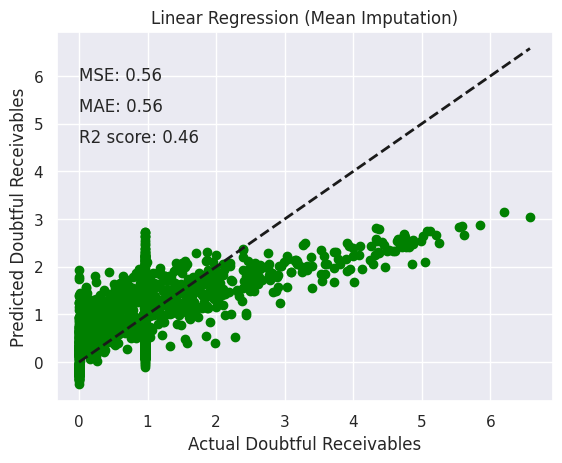

In [38]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Doubtful Receivables')
plt.ylabel('Predicted Doubtful Receivables')
plt.title('Linear Regression (Mean Imputation)')

# Compute the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Add text to the plot to display the evaluation metrics
plt.text(y_test.min(), y_test.max()*0.9, f'MSE: {mse:.2f}')
plt.text(y_test.min(), y_test.max()*0.8, f'MAE: {mae:.2f}')
plt.text(y_test.min(), y_test.max()*0.7, f'R2 score: {r2:.2f}')

# Show the plot
plt.show()

In [37]:
#(2) Ridge

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression object
model = Ridge(alpha=1000)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)

# Print out the results
print(f'Mean squared error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean squared error: 0.58
R-squared: 0.44


In [40]:
#(3) Randomforest

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a random forest regression model and fit it to the training data
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the mean squared error (MSE) and R-squared for the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the results
print(f'Mean squared error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean squared error: 0.44
R-squared: 0.58


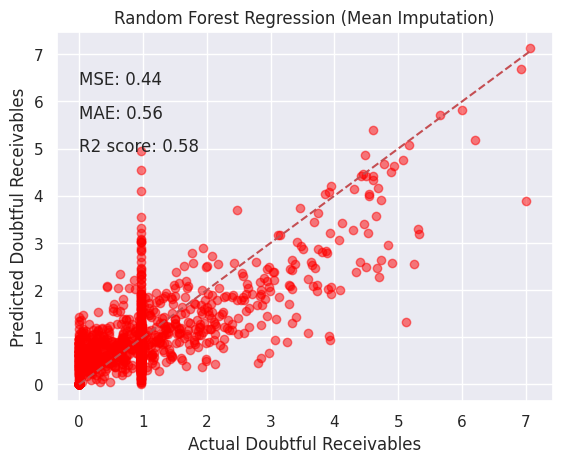

In [42]:
import matplotlib.pyplot as plt

# Create a scatter plot of the predicted versus actual values
plt.scatter(y_test, y_pred, color='red', alpha=0.5)

# Add a line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Set the plot title and axes labels
plt.title('Random Forest Regression (Mean Imputation)')
plt.xlabel('Actual Doubtful Receivables')
plt.ylabel('Predicted Doubtful Receivables')

# Add text to the plot to display the evaluation metrics
plt.text(y_test.min(), y_test.max()*0.9, f'MSE: {mse:.2f}')
plt.text(y_test.min(), y_test.max()*0.8, f'MAE: {mae:.2f}')
plt.text(y_test.min(), y_test.max()*0.7, f'R2 score: {r2:.2f}')

# Show the plot
plt.show()

In [43]:
# Case 2: delete rows missing "recd"

In [43]:
df_drop = df.dropna(subset=['recd'], inplace=False)

In [44]:
df_drop

,conm,rect,revt,GVKEY,YEAR,recd,avg_vwretd,log_revt,log_rect,log_recd,log_avg_vwretd,y_imputed
0,ALBERTO-CULVER CO,154.207,2247.163,1239,2000,10.135,0.000000,7.717869,5.044760,2.410093,0.000000,2.410093
1,ALBERTO-CULVER CO,169.657,2494.180,1239,2001,11.387,0.000000,7.822116,5.139656,2.516648,0.000000,2.516648
2,ALBERTO-CULVER CO,209.010,2650.976,1239,2002,17.550,0.000000,7.883060,5.347155,2.920470,0.000000,2.920470
3,ALBERTO-CULVER CO,226.054,2891.417,1239,2003,19.111,2.462588,7.969848,5.425188,3.001267,1.242016,3.001267
4,ALBERTO-CULVER CO,250.008,3257.996,1239,2004,12.860,1.050260,8.089174,5.525485,2.629007,0.717967,2.629007
...,...,...,...,...,...,...,...,...,...,...,...,...
7647,ARKO CORP,59.845,4128.690,312066,2019,0.384,2.231376,8.325958,4.108330,0.324978,1.172908,0.324978
7648,ARKO CORP,92.864,3910.715,312066,2020,0.569,1.873544,8.271731,4.541847,0.450438,1.055546,0.450438
7649,ARKO CORP,62.342,7417.398,312066,2021,1.100,1.785232,8.911718,4.148549,0.741937,1.024331,0.741937
7650,JUST EAT TAKEAWAY.COM N.V.,58.000,467.000,322576,2019,2.000,2.231376,6.148468,4.077537,1.098612,1.172908,1.098612


In [45]:
df_drop.describe()

,rect,revt,GVKEY,YEAR,recd,avg_vwretd,log_revt,log_rect,log_recd,log_avg_vwretd,y_imputed
count,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000
mean,279.049107,5798.288279,68631.497801,2009.452619,11.115412,1.007612,6.641893,3.071097,0.966772,0.592091,0.966772
std,1325.518850,21481.460159,64677.799953,6.158723,58.635678,0.883234,2.255058,2.231394,1.274762,0.468106,1.274762
min,0.000000,0.000000,1239.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.559250,236.426000,14519.000000,2004.000000,0.025000,0.000000,5.469855,1.269550,0.024693,0.000000,0.024693
50%,16.488000,838.547500,32063.000000,2009.000000,0.510500,1.045395,6.732863,2.861515,0.412441,0.715591,0.412441
75%,98.403500,3260.361500,127282.000000,2015.000000,3.230750,1.581331,8.089900,4.599187,1.442379,0.948305,1.442379
max,31622.000000,469822.000000,322576.000000,2022.000000,1836.000000,2.495915,13.060111,10.361640,7.515889,1.251595,7.515889


In [118]:
#(0) simple linear

In [53]:
features_drop = ['log_rect', 'log_revt', 'log_avg_vwretd']
w = df_drop[features_drop]
z = df_drop['log_recd']

lr_many_features = LinearRegression()
lr_many_features.fit(w, z)

LinearRegression()

In [54]:
print(('prediction = ' +
       f'{lr_many_features.intercept_} +\n' +
       ' +\n'.join([f'{n} * {f}' for f, n in zip(features, lr_many_features.coef_)])))

prediction = -0.3410606102589777 +
0.47696943610371434 * log_rect +
-0.01646738418292031 * log_revt +
-0.08041457163836185 * log_avg_vwretd


In [55]:
print(w.shape)
print(z.shape)

(5002, 3)
(5002,)


In [ ]:
#(1) linear

In [48]:
w_train, w_test, z_train, z_test = train_test_split(w, z, test_size=0.2, random_state=42)

# Train a linear regression model and make predictions
model = LinearRegression()
model.fit(w_train, z_train)

z_pred = model.predict(w_test)

In [49]:
# Compute the MSE, MAE, and R2 score for the predictions
mse = mean_squared_error(z_test, z_pred)
mae = mean_absolute_error(z_test, z_pred)
r2 = r2_score(z_test, z_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 score: {r2:.2f}')

MSE: 0.16
MAE: 0.19
R2 score: 0.91


In [50]:
print(z_pred)

[2.4375129  0.24940174 0.04095832 1.0150817  2.3136939  1.78395813
 1.19355259 0.04095832 3.5233276  0.04095832 0.23054904 0.13296929
 0.46715198 0.57788716 0.88612229 0.12415293 2.08639809 0.19746535
 1.99124954 0.17755981 0.04095832 0.43688271 0.63432704 0.04095832
 0.47148801 0.2754948  0.04095832 0.04095832 3.30067305 0.04577321
 0.04095832 0.04095832 3.84804793 1.03493697 1.79217557 0.36232943
 0.59544009 1.68106255 0.94161494 0.04095832 3.09909668 0.04095832
 0.22896124 0.04095832 4.26064533 3.4779963  1.7406266  0.77723126
 0.63589211 0.34416682 4.45731348 2.98467931 0.73347871 0.32349703
 1.37078115 0.07230164 0.04095832 0.04095832 0.11436103 0.58505657
 0.04095832 1.21152184 1.10955315 0.04095832 3.6583518  0.34557614
 0.04095832 0.04095832 1.68669574 0.04095832 0.5823054  2.05563236
 1.69994427 1.53495121 0.04095832 0.04095832 1.63254783 2.76231494
 1.44908268 0.23687427 5.94301246 0.04095832 0.04095832 0.09173026
 0.04095832 1.74740822 1.42037194 0.04095832 2.16212491 0.0999

In [51]:
# Concatenate the X_test and y_test dataframes with the predicted values
results = pd.concat([w_test, z_test, pd.Series(z_pred, name='recd_pred')], axis=1)

# Print out the results dataframe
print(results)

      log_recd_LAG1  log_recd  recd_pred
3013       2.482487  2.589117        NaN
3663       0.215918  0.279146        NaN
2948       0.000000  0.000000        NaN
96         1.009052  0.932951   0.181741
2282       2.354228  2.065089        NaN
...             ...       ...        ...
832             NaN       NaN   4.646503
833             NaN       NaN   4.653197
834             NaN       NaN   0.053427
835             NaN       NaN   1.658737
836             NaN       NaN   0.782172

[1484 rows x 3 columns]


In [102]:
# Filter out instances with zero actual values
non_zero_indices = z_test != 0
z_test_non_zero = z_test[non_zero_indices]
z_pred_non_zero = z_pred[non_zero_indices]

# Calculate MAPE for non-zero instances
mape = np.mean(np.abs((z_test_non_zero - z_pred_non_zero) / z_test_non_zero)) * 100

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 491.69456999863075


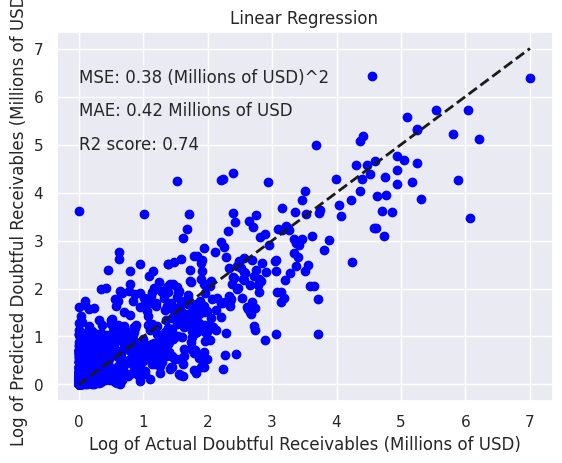

In [98]:
# Plot the actual vs. predicted values
plt.scatter(z_test, z_pred, color='blue')
plt.plot([z_test.min(), z_test.max()], [z_test.min(), z_test.max()], 'k--', lw=2)
plt.xlabel('Log of Actual Doubtful Receivables (Millions of USD)')
plt.ylabel('Log of Predicted Doubtful Receivables (Millions of USD)')
plt.title('Linear Regression')

# Compute the evaluation metrics
mse = mean_squared_error(z_test, z_pred)
mae = mean_absolute_error(z_test, z_pred)
r2 = r2_score(z_test, z_pred)

# Add text to the plot to display the evaluation metrics with units
plt.text(z_test.min(), z_test.max()*0.9, f'MSE: {mse:.2f} (Millions of USD)^2')
plt.text(z_test.min(), z_test.max()*0.8, f'MAE: {mae:.2f} Millions of USD')
plt.text(z_test.min(), z_test.max()*0.7, f'R2 score: {r2:.2f}')

# Show the plot
plt.show()

In [ ]:
# (1-2) histrogram

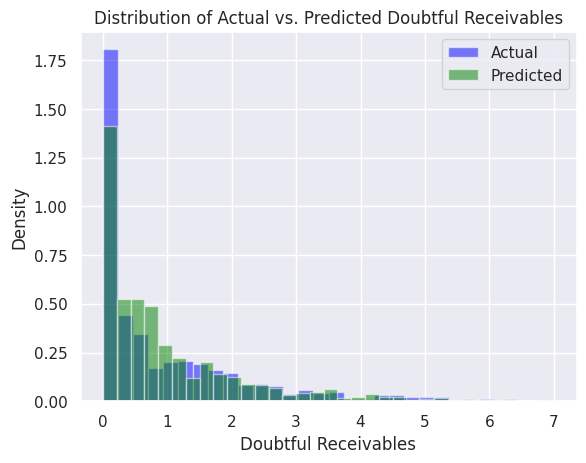

In [48]:
import matplotlib.pyplot as plt

# Create a histogram or density plot
plt.hist(z_test, bins=30, density=True, alpha=0.5, color='blue', label='Actual')
plt.hist(z_pred, bins=30, density=True, alpha=0.5, color='green', label='Predicted')
plt.xlabel('Doubtful Receivables')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Doubtful Receivables')
plt.legend()

# Show the plot
plt.show()

In [ ]:
#(2) Ridge

In [62]:
from sklearn.linear_model import Ridge

# Create a Ridge regression object
model = Ridge(alpha=1.0)

# Fit the model to the training data
model.fit(w_train, z_train)

# Make predictions on the test set
z_pred = model.predict(w_test)


In [63]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(w_train)

# Transform the training and test sets
w_train_scaled = scaler.transform(w_train)
w_test_scaled = scaler.transform(w_test)

# Create a Ridge regression object
model = Ridge(alpha=1.0)

# Fit the model to the training data
model.fit(w_train_scaled, z_train)

# Make predictions on the test set
z_pred = model.predict(w_test_scaled)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error (MSE)
mse = mean_squared_error(z_test, z_pred)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(z_test, z_pred)

# Print out the results
print(f'Mean squared error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean squared error: 0.54
R-squared: 0.64


In [ ]:
#(3) Randomforest

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
w_train, w_test, z_train, z_test = train_test_split(w, z, test_size=0.2, random_state=42)

# Create a random forest regression model and fit it to the training data
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(w_train, z_train)

# Make predictions on the test data
z_pred = rf.predict(w_test)

# Calculate the mean squared error (MSE) and R-squared for the predictions
mse = mean_squared_error(z_test, z_pred)
r2 = r2_score(z_test, z_pred)

# Print out the results
print(f'Mean squared error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean squared error: 0.55
R-squared: 0.02


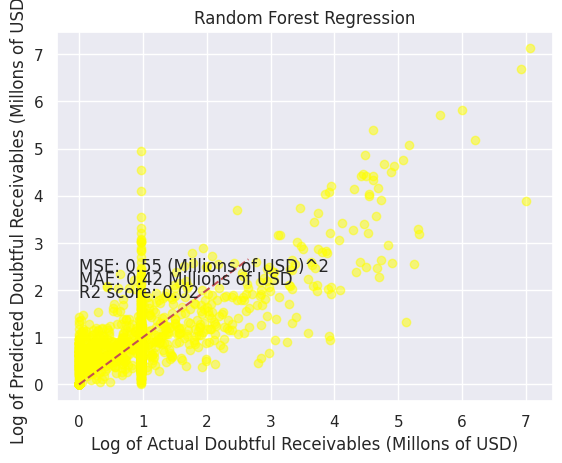

In [104]:
import matplotlib.pyplot as plt

# Create a scatter plot of the predicted versus actual values
plt.scatter(y_test, y_pred, color='yellow', alpha=0.5)

# Add a line representing perfect predictions
plt.plot([z_test.min(), z_test.max()], [z_test.min(), z_test.max()], 'r--')

# Set the plot title and axes labels
plt.title('Random Forest Regression')
plt.xlabel('Log of Actual Doubtful Receivables (Millons of USD)')
plt.ylabel('Log of Predicted Doubtful Receivables (Millons of USD)')

# Add text to the plot to display the evaluation metrics with units
plt.text(z_test.min(), z_test.max()*0.9, f'MSE: {mse:.2f} (Millions of USD)^2')
plt.text(z_test.min(), z_test.max()*0.8, f'MAE: {mae:.2f} Millions of USD')
plt.text(z_test.min(), z_test.max()*0.7, f'R2 score: {r2:.2f}')

# Show the plot
plt.show()

In [105]:
# Filter out instances with zero actual values
non_zero_indices = z_test != 0
z_test_non_zero = z_test[non_zero_indices]
z_pred_non_zero = z_pred[non_zero_indices]

# Calculate MAPE for non-zero instances
mape = np.mean(np.abs((z_test_non_zero - z_pred_non_zero) / z_test_non_zero)) * 100

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 124.93212195433266


In [ ]:
#how does your model compare to one that just uses last year's bad debt numbers?

In [57]:
import pandas as pd
df_ly = pd.read_csv("capstone_03.csv")
df_ly

,conm,rect,revt,GVKEY,YEAR,recd,avg_vwretd,log_revt,log_rect,log_recd,log_avg_vwretd,log_recd_LAG1
0,ALBERTO-CULVER CO,169.657,2494.180,1239,2001,11.387,0.000000,7.822116,5.139656,2.516648,0.000000,2.410093
1,ALBERTO-CULVER CO,209.010,2650.976,1239,2002,17.550,0.000000,7.883060,5.347155,2.920470,0.000000,2.516648
2,ALBERTO-CULVER CO,226.054,2891.417,1239,2003,19.111,2.462588,7.969848,5.425188,3.001267,1.242016,2.920470
3,ALBERTO-CULVER CO,250.008,3257.996,1239,2004,12.860,1.050260,8.089174,5.525485,2.629007,0.717967,3.001267
4,ALBERTO-CULVER CO,285.940,3531.231,1239,2005,6.139,0.619588,8.169685,5.659273,1.965573,0.482172,2.629007
...,...,...,...,...,...,...,...,...,...,...,...,...
4180,COASTAL CONTACTS INC,7.059,217.550,266196,2013,0.408,2.269183,5.387015,2.086789,0.342170,1.184540,0.592774
4181,PEPPER FOOD SERVICE CO LTD,43.003,447.390,279170,2018,0.004,0.000000,6.105663,3.784258,0.003992,0.000000,0.003992
4182,ARKO CORP,92.864,3910.715,312066,2020,0.569,1.873544,8.271731,4.541847,0.450438,1.055546,0.324978
4183,ARKO CORP,62.342,7417.398,312066,2021,1.100,1.785232,8.911718,4.148549,0.741937,1.024331,0.450438


In [58]:
from sklearn.model_selection import train_test_split

X = df_ly['log_recd_LAG1'].values.reshape(-1, 1)  # Input feature
y = df_ly['log_recd'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)

In [64]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2_score)

Mean Squared Error (MSE): 0.15668799213361528
Mean Absolute Error (MAE): 0.18537647162700277
R2 Score: 0.9069919428631416
